# Install packages

In [2]:
install.packages("corrplot")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


# Load packages

In [3]:
library(corrplot)

corrplot 0.84 loaded


# Initial brainstorm

`crmrte`, crimes committed per person is the endogenous variable

# Data cleaning

In [4]:
data <- read.table("crime_v2.csv", header=TRUE, sep=",")
data <- na.omit(data, cols="county")  # Remove empty rows read into bottom of table
data$prbconv <- as.numeric(data$prbconv)  # Convert factor column to numeric
data = subset(data, select=-c(year))  # Drop column column with only 1 unique value
# sapply(data, class)  # Double check data types

# EDA

,county,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
county,1.000000000,0.01131013,-0.01935153,0.075635717,-0.072709805,0.01072730,0.06723391,-0.03153617,-0.07534548,0.03626055,...,0.030212934,0.013212398,0.038588306,0.139599977,-0.047961950,-0.008659538,0.106695595,0.07787351,-0.06411729,0.095839084
crmrte,0.011310134,1.00000000,-0.39332974,-0.398228521,0.046984278,0.02741132,0.16988485,0.72896316,0.45097978,-0.34938461,...,0.229357560,0.410105585,0.329611990,-0.052568836,0.354288005,0.486155765,0.201991289,0.34843532,-0.13042871,0.291248491
prbarr,-0.019351528,-0.39332974,1.00000000,-0.075392928,0.045441890,0.18001477,0.42644092,-0.30138532,-0.13501969,0.16673500,...,-0.072128771,-0.101838860,-0.173762086,-0.131526923,-0.151876293,-0.208669516,-0.161229976,-0.02727041,0.41321102,-0.180269195
prbconv,0.075635717,-0.39822852,-0.07539293,1.000000000,0.037715591,0.03134689,-0.02781855,-0.29548480,-0.27892799,0.01541320,...,0.006444062,-0.130703444,0.050512911,0.170075348,0.061605221,0.018756100,-0.113448475,0.03437167,-0.33241442,-0.226625243
prbpris,-0.072709805,0.04698428,0.04544189,0.037715591,1.000000000,-0.09607929,0.04718530,0.07656438,-0.09336370,-0.04084976,...,0.125732287,0.140086766,0.034067883,0.038178712,0.008590339,0.085620047,-0.031980764,0.08269815,0.11613960,-0.083157977
avgsen,0.010727296,0.02741132,0.18001477,0.031346885,-0.096079288,1.00000000,0.49043580,0.07838791,0.09632028,0.08317835,...,0.214590132,0.080647962,0.163621016,-0.150995893,0.116021950,0.144378311,0.133787438,0.12388542,-0.13687970,0.073961753
polpc,0.067233912,0.16988485,0.42644092,-0.027818550,0.047185296,0.49043580,1.00000000,0.16112906,0.28361567,0.13846874,...,0.166453968,0.111820841,0.189477547,-0.016947344,0.272404410,0.158919336,0.051494258,0.37521273,0.02541011,0.051598099
density,-0.031536167,0.72896316,-0.30138532,-0.295484797,0.076564378,0.07838791,0.16112906,1.00000000,0.32217431,-0.14126671,...,0.328750888,0.577537292,0.540680532,0.043410263,0.440677008,0.585787038,0.222452602,0.44935488,-0.13569967,0.116213908
taxpc,-0.075345483,0.45097978,-0.13501969,-0.278927987,-0.093363699,0.09632028,0.28361567,0.32217431,1.00000000,-0.19467439,...,0.162755036,0.166899227,0.123560472,0.074907194,0.261261779,0.058342289,-0.031109414,0.20676211,-0.04156935,-0.089212589
west,0.036260550,-0.34938461,0.16673500,0.015413201,-0.040849757,0.08317835,0.13846874,-0.14126671,-0.19467439,1.00000000,...,0.098678447,-0.128507253,-0.023252605,-0.056967840,-0.012417552,-0.167055035,-0.083844170,-0.08792384,-0.01204112,-0.044840286


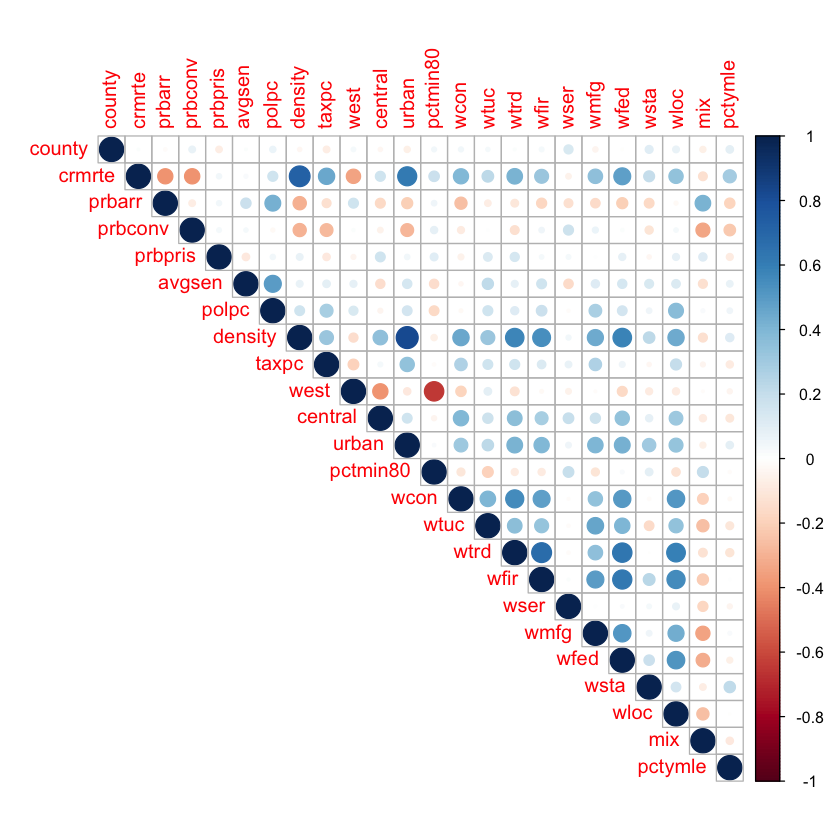

In [5]:
correlations <- cor(data)
correlations
corrplot(correlations, type="upper", method='circle')

Want to include features correlated with `crmrte` but not correlated with each other. 

See that there are many groups of features that are correlated with each other, e.g.,:
* `density`, `wcon`, `wtuc`, `wtrd`, `wfir`, `wmfg`, `wfed`, `wsta`, `wloc` as higher paying jobs are often found in cities
* `pbarr`, `polpc`, `avgsen` as the more police there are, the higher the chance of being arrested.  The average sentence length may be related as counties with more police officers may be "harder on crime" as well

Out of these groups of features, we want to choose ones that are:
1. Correlated with `crmrte`
2. Potentially able to cause higher/lower crime rates or be a metric that we can directly impact through policy (rather than simply related to crime)

Initial list: `density`, `polpc`, `pctymle`

# Modeling

## Baseline model

In [7]:
baseline_model = lm(crmrte ~ density + polpc + pctymle, data=data)
summary(baseline_model)


Call:
lm(formula = crmrte ~ density + polpc + pctymle, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.023479 -0.008094 -0.002242  0.005199  0.052813 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0054372  0.0053140   1.023  0.30905    
density     0.0086606  0.0008831   9.807    1e-15 ***
polpc       0.8922117  1.3477221   0.662  0.50971    
pctymle     0.1675727  0.0566615   2.957  0.00399 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01245 on 87 degrees of freedom
Multiple R-squared:  0.5768,	Adjusted R-squared:  0.5622 
F-statistic: 39.52 on 3 and 87 DF,  p-value: 3.281e-16
